## Steer Function Comparison
In this notebook, we examine the planners using different steer functions.

In [5]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def benchmark(steer_function: str, settings: [dict]):
    pool = MultipleMPB()
    for setting in settings:
        m = MPB()
        m.update(setting)
        m.set_steer_functions([steer_function])
        m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
        pool.benchmarks.append(m)

### Moving AI Scenarios

In [19]:
scenario = 'Berlin_0_256.map.scen'
num_scenarios = 20
steer_function = 'reeds_shepp'

scenario_file = '/root/code/mpb/bin/moving_ai_scenarios/%s' % scenario

config = MPB.get_config()
config["benchmark.moving_ai.active"] = True
pool = MultipleMPB()
for i in range(num_scenarios):
    m = MPB()
    config["benchmark.moving_ai.start"] = i - num_scenarios
    config["benchmark.moving_ai.end"] = i - num_scenarios
    config["benchmark.moving_ai.scenario"] = scenario_file
    m.update(deepcopy(config))
    m.set_steer_functions([steer_function])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    pool.benchmarks.append(m)
pool.run_parallel("moving_ai_%s" % steer_function)

Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max']
Selected steer functions: ['reeds_shepp']
Selected smoothers: ['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplif


Benchmark 2 (moving_ai_reeds_shepp_2) finished successfully.

Benchmark 5 (moving_ai_reeds_shepp_5) finished successfully.

Benchmark 18 (moving_ai_reeds_shepp_18) finished successfully.

Benchmark 14 (moving_ai_reeds_shepp_14) finished successfully.

Benchmark 7 (moving_ai_reeds_shepp_7) finished successfully.

Benchmark 6 (moving_ai_reeds_shepp_6) finished successfully.

Benchmark 1 (moving_ai_reeds_shepp_1) finished successfully.

Benchmark 4 (moving_ai_reeds_shepp_4) finished successfully.

Benchmark 16 (moving_ai_reeds_shepp_16) finished successfully.

Benchmark 8 (moving_ai_reeds_shepp_8) finished successfully.

Benchmark 11 (moving_ai_reeds_shepp_11) finished successfully.

Benchmark 17 (moving_ai_reeds_shepp_17) finished successfully.

Benchmark 10 (moving_ai_reeds_shepp_10) finished successfully.

Benchmark 13 (moving_ai_reeds_shepp_13) finished successfully.

Benchmark 15 (moving_ai_reeds_shepp_15) finished successfully.

Benchmark 12 (moving_ai_reeds_shepp_12) finished succ

0

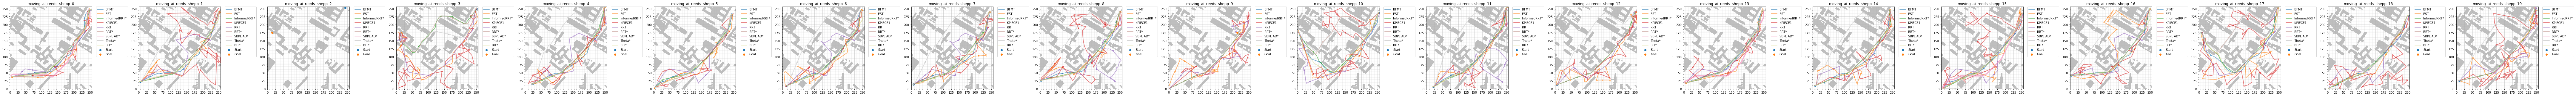

In [16]:
pool.visualize_trajectories(show_legend=True)

Successfully merged [moving_ai_reeds_shepp/moving_ai_reeds_shepp_0_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_1_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_2_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_3_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_4_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_5_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_6_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_7_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_8_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_9_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_10_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_11_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_12_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_13_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_14_results.json, moving_ai_reeds_shepp/moving_ai_reeds_shepp_15_results.json, moving_ai_ree

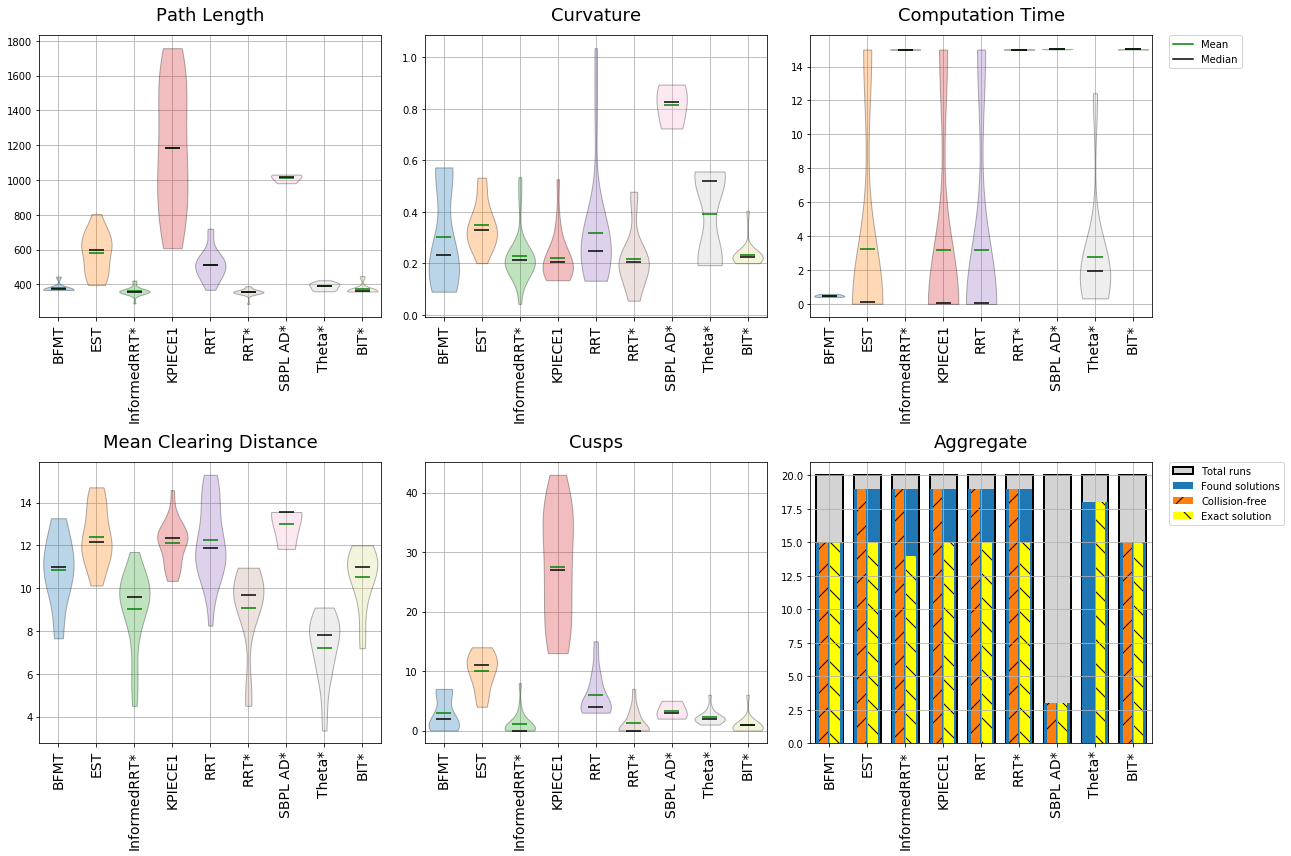

In [21]:
MPB.merge(pool.benchmarks, "moving_ai_%s/total.json" % steer_function, make_separate_runs=True)
from plot_stats import plot_planner_stats
plot_planner_stats("moving_ai_%s/total.json" % steer_function)